<a href="https://colab.research.google.com/github/jungihong10/LSTM/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import random
import csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/LSTM/preprocessed_data.csv')
# Separate input features and output labels
X = data.drop('Status', axis=1)
y = data['Status']

In [ ]:
# Scale input features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1, shuffle=False)

loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32")



Epoch 1/100
225/225 [==============================] - 6s 9ms/step - loss: 0.4946 - accuracy: 0.7875 - val_loss: 0.2685 - val_accuracy: 0.9488
Epoch 2/100
225/225 [==============================] - 1s 5ms/step - loss: 0.2068 - accuracy: 0.9341 - val_loss: 0.1181 - val_accuracy: 0.9475
Epoch 3/100
225/225 [==============================] - 1s 6ms/step - loss: 0.1144 - accuracy: 0.9573 - val_loss: 0.0770 - val_accuracy: 0.9712
Epoch 4/100
225/225 [==============================] - 2s 7ms/step - loss: 0.0806 - accuracy: 0.9683 - val_loss: 0.0583 - val_accuracy: 0.9712
Epoch 5/100
225/225 [==============================] - 2s 8ms/step - loss: 0.0630 - accuracy: 0.9758 - val_loss: 0.0435 - val_accuracy: 0.9712
Epoch 6/100
225/225 [==============================] - 1s 6ms/step - loss: 0.0498 - accuracy: 0.9830 - val_loss: 0.0351 - val_accuracy: 0.9737
Epoch 7/100
225/225 [==============================] - 1s 5ms/step - loss: 0.0382 - accuracy: 0.9882 - val_loss: 0.0237 - val_accuracy: 1.0000

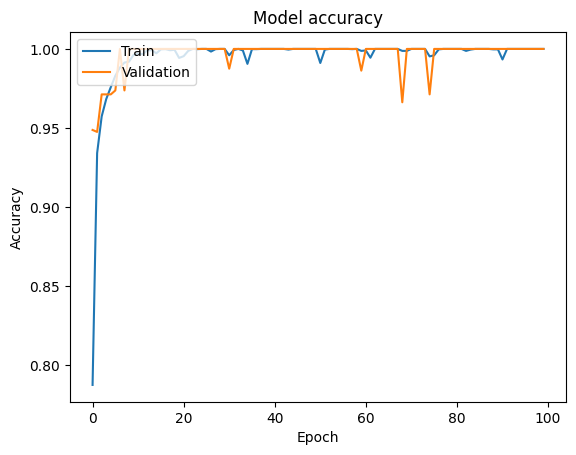

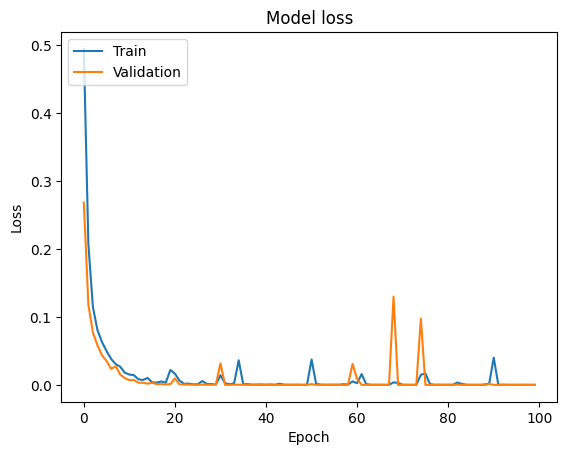

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

63/63 [==============================] - 0s 3ms/step


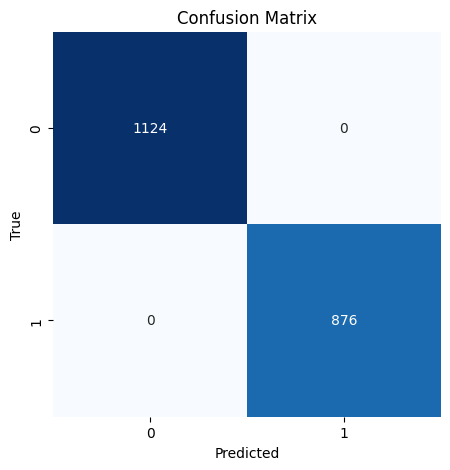

In [ ]:
# Get the confusion matrix
y_pred = (model.predict(X_test) > 0.5).astype("int32")

cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Correlation Matrix: A correlation matrix helps visualize the relationships between features. This can be useful to understand if some features are highly correlated and if there's potential multicollinearity. You can use a heatmap to visualize the correlation matrix.

We can see from the graph below that temp and dewpoint is somehow correlated to each other.


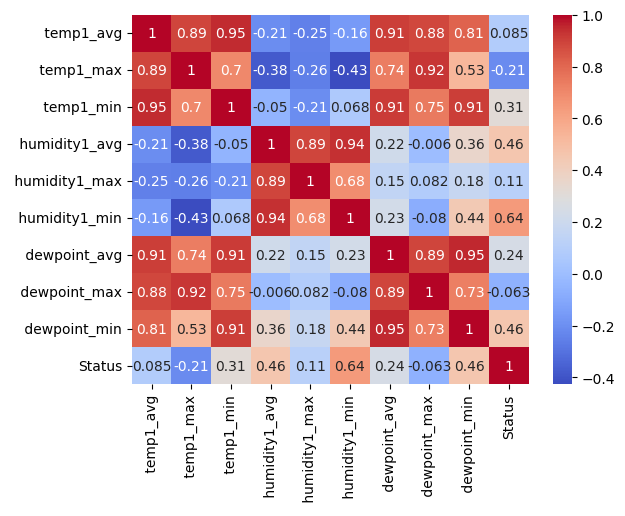

In [16]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

Pair Plots: Pair plots display scatter plots between all pairs of features in the dataset. This can be helpful in understanding the relationships between features and the distribution of data. You can use seaborn's pairplot function to create pair plots.

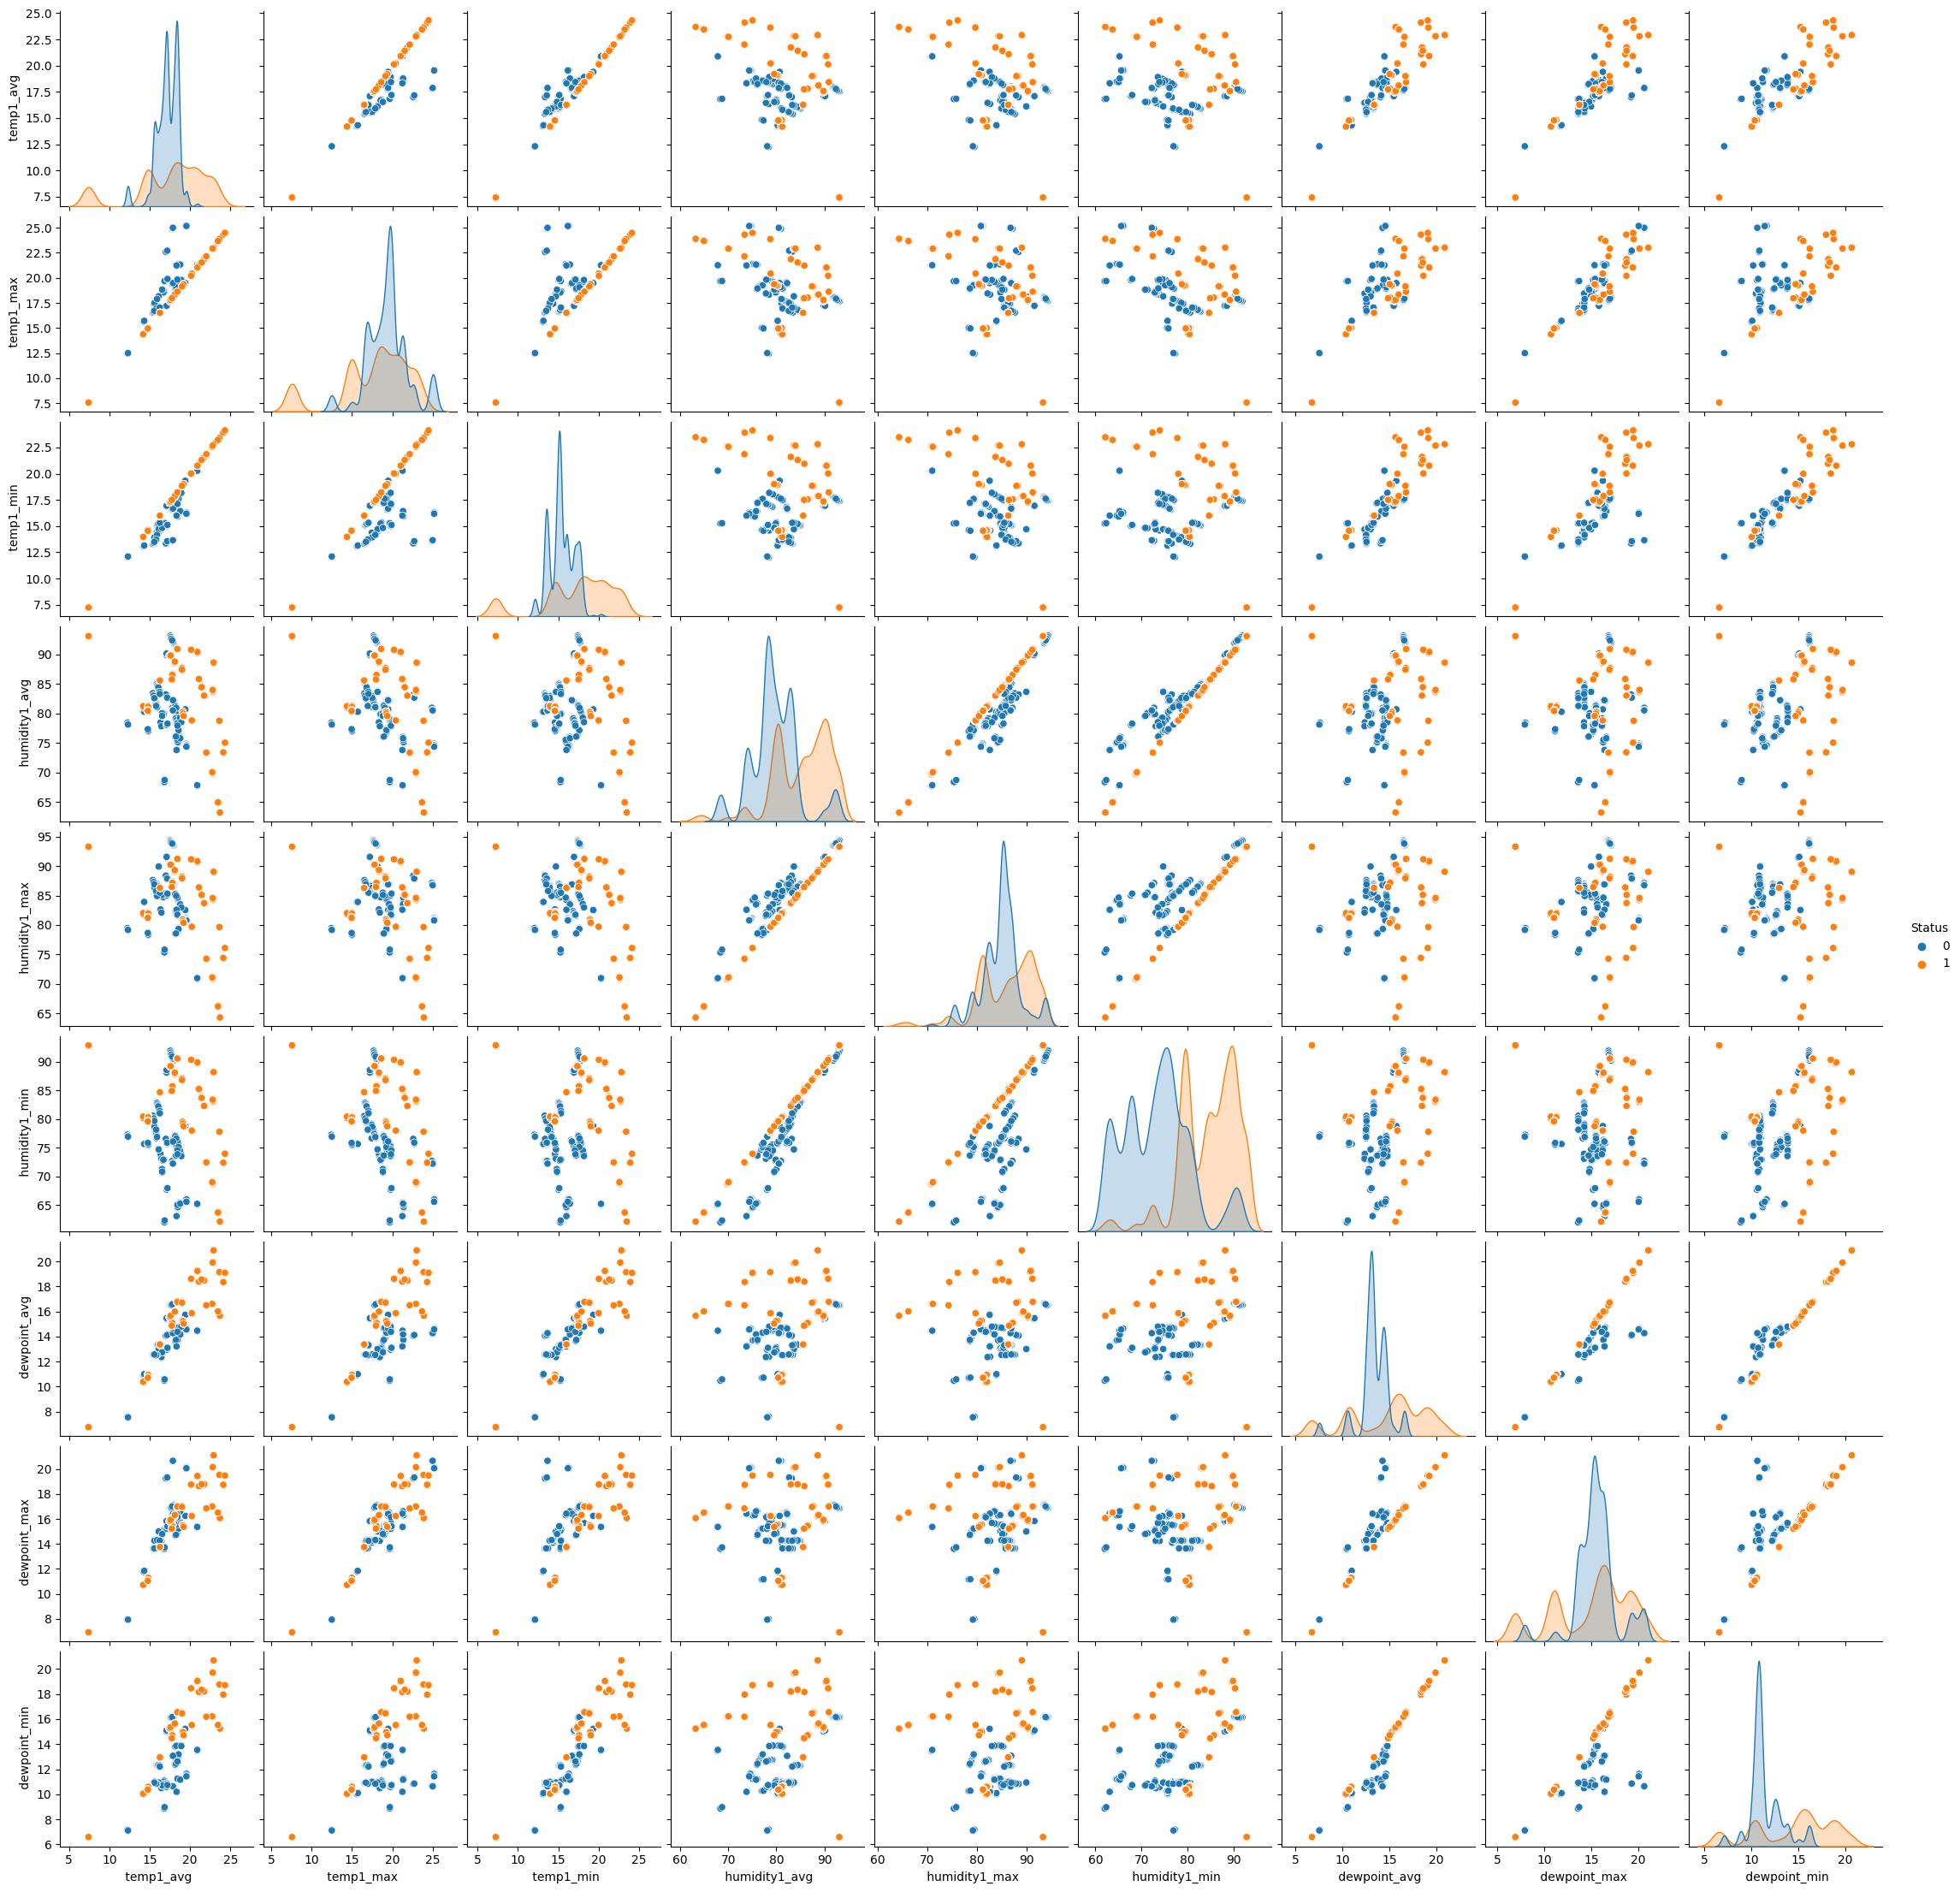

In [10]:
sns.pairplot(data, hue='Status')
plt.show()

Precision-Recall Curve: A precision-recall curve shows the trade-off between precision and recall for different thresholds. This can be useful when the dataset has class imbalance.

63/63 [==============================] - 0s 5ms/step


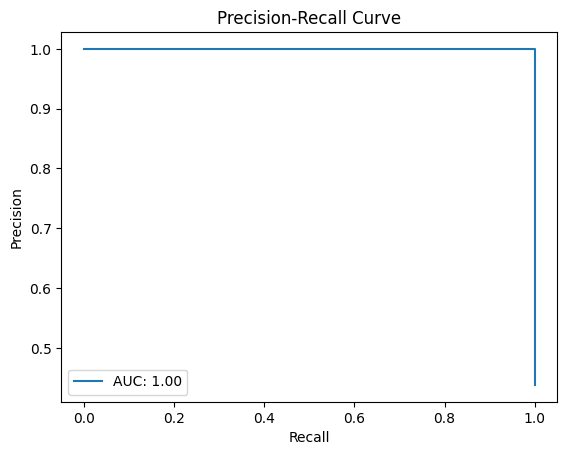

In [15]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

y_scores = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
average_precision = average_precision_score(y_test, y_scores)

plt.plot(recall, precision, label='AUC: {:.2f}'.format(average_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()


ROC Curve: A receiver operating characteristic (ROC) curve shows the true positive rate (sensitivity) against the false positive rate (1-specificity) for different thresholds. It helps assess the model's performance in terms of trade-offs between sensitivity and specificity.


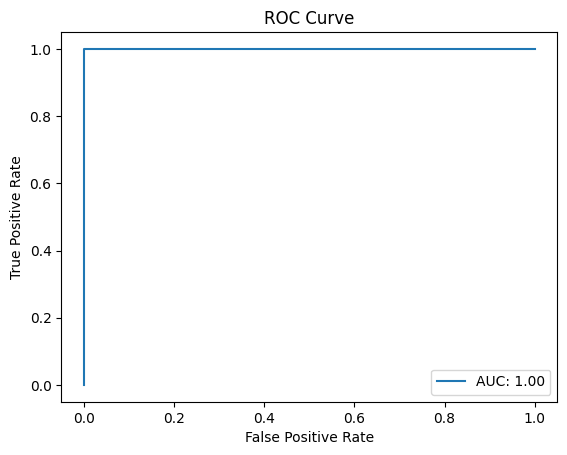

In [14]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_scores)
auc = roc_auc_score(y_test, y_scores)

plt.plot(fpr, tpr, label='AUC: {:.2f}'.format(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

calculate the Area Under the Curve (AUC): 

This code will calculate the false positive rate (FPR), true positive rate (TPR), and thresholds using the roc_curve function. It will also calculate the AUC using the roc_auc_score function. Finally, it will plot the ROC curve and display the AUC in the legend.

63/63 [==============================] - 0s 3ms/step


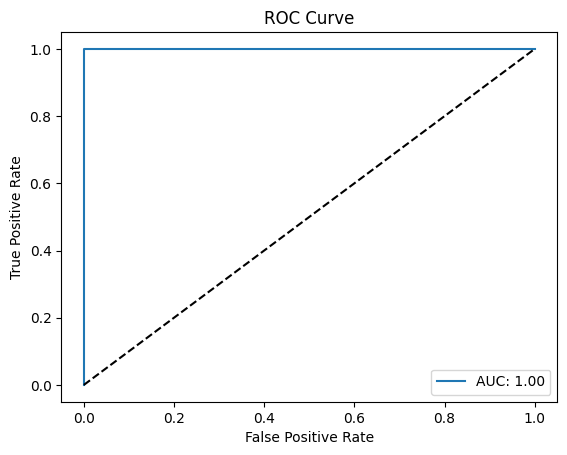

In [17]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_scores = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
auc = roc_auc_score(y_test, y_scores)

plt.plot(fpr, tpr, label='AUC: {:.2f}'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [22]:
!pip install eli5


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107747 sha256=4220a4c9549cfaaf2a45ebbc0af0bc914223affaa5e5fab8fa1aa0cf129da703
  Stored in directory: /root/.cache/pip/wheels/7b/26/a5/8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5


Feature Importance: Visualizing feature importance can help you understand which features are the most important in predicting the target variable.

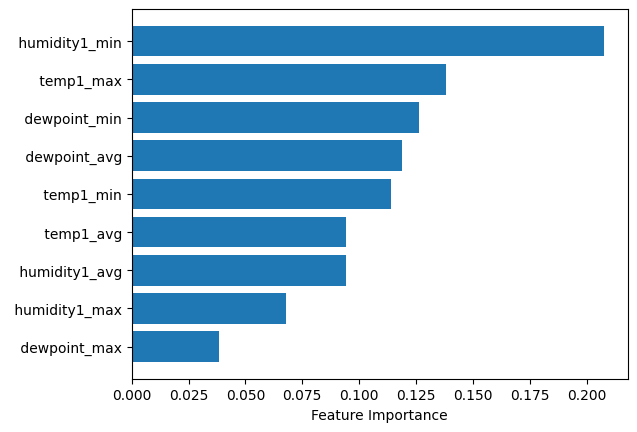

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Get the feature names from the input features DataFrame
feature_names = np.array(X.columns)

# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train.squeeze(), y_train)

# Get the feature importances
importances = rf.feature_importances_
sorted_idx = np.argsort(importances)

# Plot the feature importances
plt.barh(range(X_train.shape[2]), importances[sorted_idx])
plt.yticks(range(X_train.shape[2]), feature_names[sorted_idx])
plt.xlabel('Feature Importance')
plt.show()

